### Import Libraries

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Fetch Data From MySQL Database 

In [ ]:
connection = mysql.connector.connect(
    host='' , 
    user='',
    password='' , 
    database=''
)

In [3]:
quary = 'select * from shopping_trends;'

In [4]:
df = pd.read_sql(quary , connection)

### Data Representation

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1668,1669,66,Male,Blouse,Clothing,33,Utah,L,Charcoal,Summer,4.0,No,Credit Card,Standard,Yes,Yes,28,Debit Card,Fortnightly
6021,2122,43,Male,Backpack,Accessories,68,Alaska,M,Olive,Winter,3.5,No,Credit Card,2-Day Shipping,No,No,32,Bank Transfer,Monthly
4806,907,41,Male,Pants,Clothing,56,South Carolina,M,Red,Spring,4.2,Yes,Debit Card,Standard,Yes,Yes,21,Debit Card,Bi-Weekly
3262,3263,42,Female,T-shirt,Clothing,35,Indiana,M,Violet,Spring,2.7,No,Cash,Standard,No,No,21,Cash,Every 3 Months
739,740,64,Male,Shorts,Clothing,29,Minnesota,S,Purple,Summer,3.5,Yes,Cash,Free Shipping,Yes,Yes,26,Venmo,Bi-Weekly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7800 non-null   int64  
 1   Age                       7800 non-null   int64  
 2   Gender                    7800 non-null   object 
 3   Item Purchased            7800 non-null   object 
 4   Category                  7800 non-null   object 
 5   Purchase Amount (USD)     7800 non-null   int64  
 6   Location                  7800 non-null   object 
 7   Size                      7800 non-null   object 
 8   Color                     7800 non-null   object 
 9   Season                    7800 non-null   object 
 10  Review Rating             7800 non-null   float64
 11  Subscription Status       7800 non-null   object 
 12  Payment Method            7800 non-null   object 
 13  Shipping Type             7800 non-null   object 
 14  Discount

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.905164,15.206614,23.683874,0.716177,14.446199
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Explore Data Analysis (EDA)

Age Mean :  44


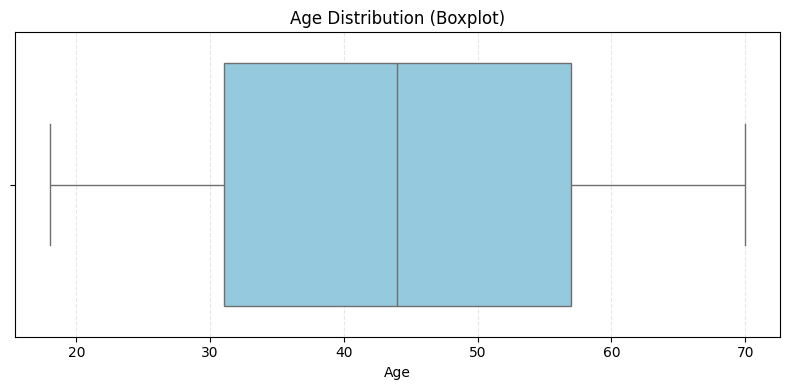

In [9]:
print('Age Mean : ' , int(df['Age'].mean()))
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Age Distribution (Boxplot)')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Customers')

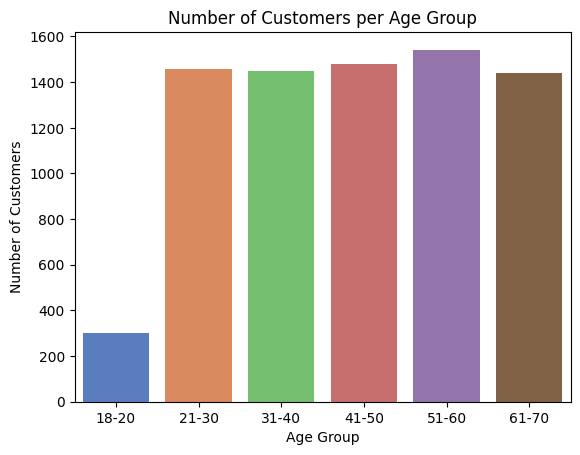

In [10]:
bins = [18, 20, 30, 40, 50, 60, 70]
labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
ax = sns.countplot(data=df, x='Age Group', palette='muted')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

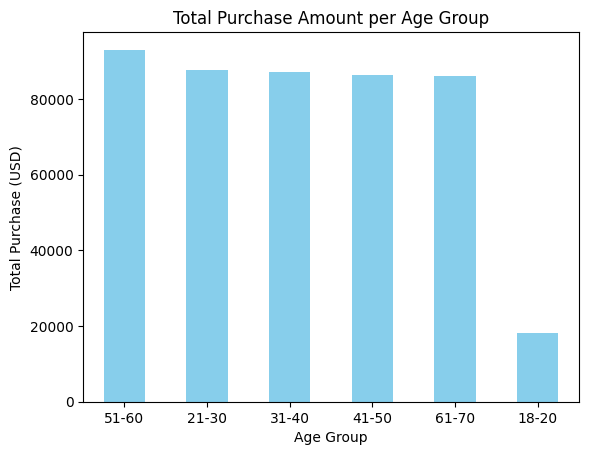

In [11]:
age_group_sales = df.groupby('Age Group')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
age_group_sales.plot(kind='bar', color='skyblue', title='Total Purchase Amount per Age Group')
plt.ylabel('Total Purchase (USD)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()

Gender
Male      5304
Female    2496
Name: count, dtype: int64


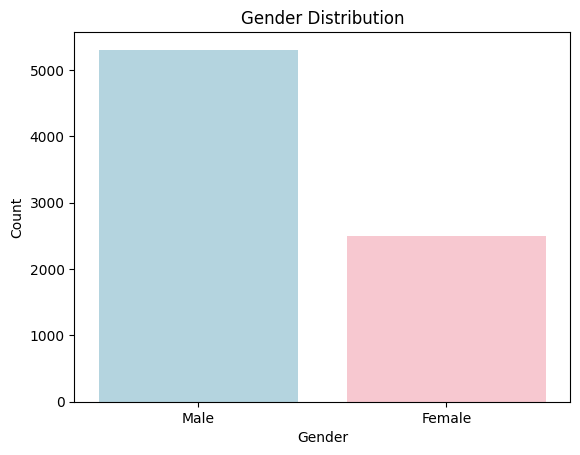

In [12]:
print(df['Gender'].value_counts())
sns.countplot(data=df, x='Gender', palette=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender
Female    150382
Male      315780
Name: Purchase Amount (USD), dtype: int64


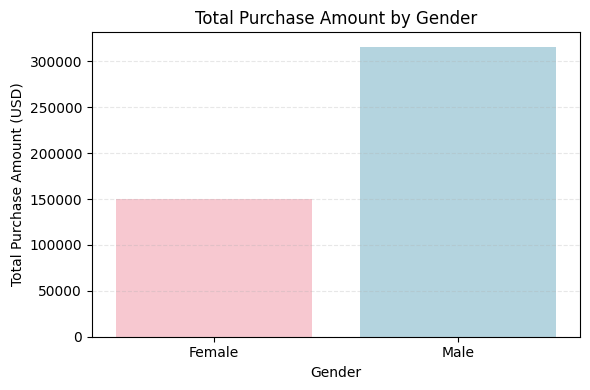

In [13]:
gender_total = df.groupby("Gender")["Purchase Amount (USD)"].sum().sort_values()
print(gender_total)
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_total.index, y=gender_total.values, palette=['pink', 'lightblue'])
plt.title("Total Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

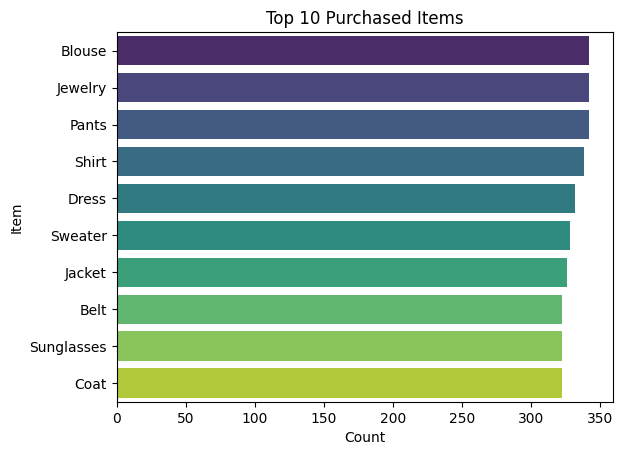

In [14]:
top_items = df['Item Purchased'].value_counts().nlargest(10)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Purchased Items')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

In [15]:
category = df['Category'].value_counts()
print(category)

Category
Clothing       3474
Accessories    2480
Footwear       1198
Outerwear       648
Name: count, dtype: int64


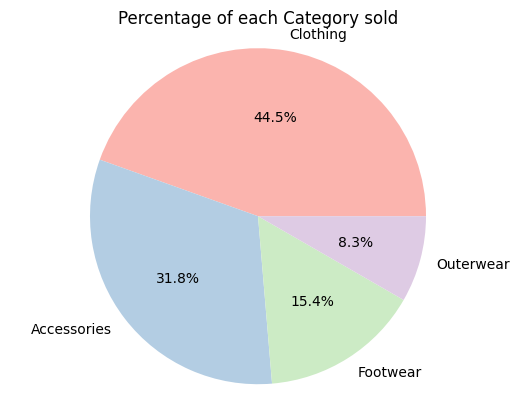

In [16]:
plt.pie(category , labels=category.index , autopct="%1.1f%%" , colors=plt.cm.Pastel1.colors)
plt.title('Percentage of each Category sold')
plt.axis('equal')
plt.show()

In [17]:
season_sales = df['Season'].value_counts()
print(season_sales)

Season
Spring    1998
Fall      1950
Winter    1942
Summer    1910
Name: count, dtype: int64


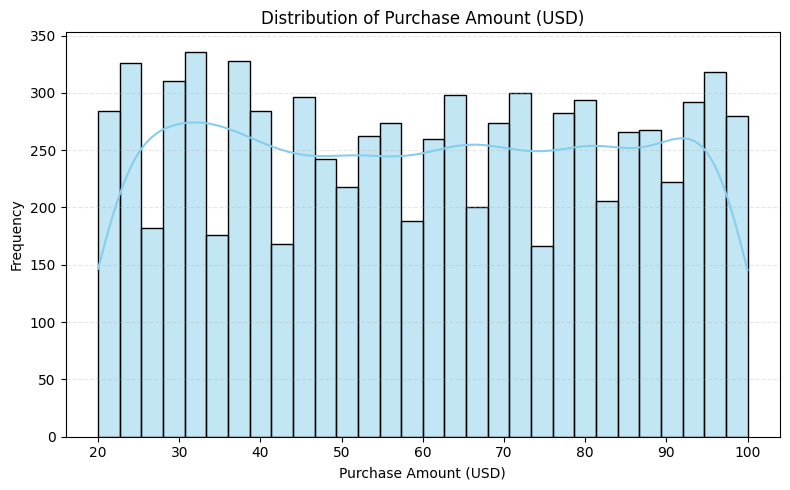

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Purchase Amount (USD)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Purchase Amount (USD)")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


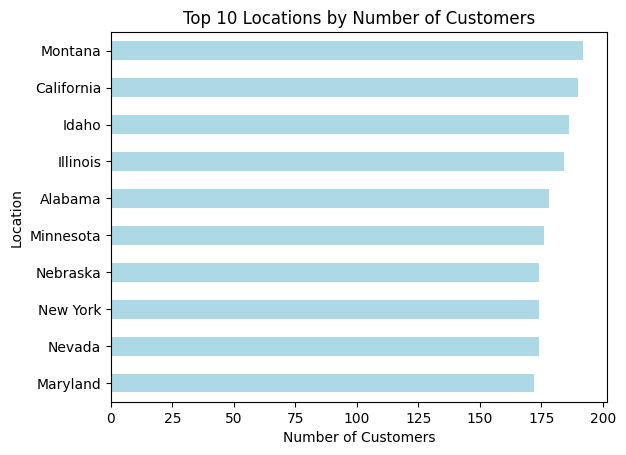

In [19]:
top_locations = df['Location'].value_counts().head(10)
top_locations.plot(kind='barh', color='lightblue', title='Top 10 Locations by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.gca().invert_yaxis() 
plt.show()

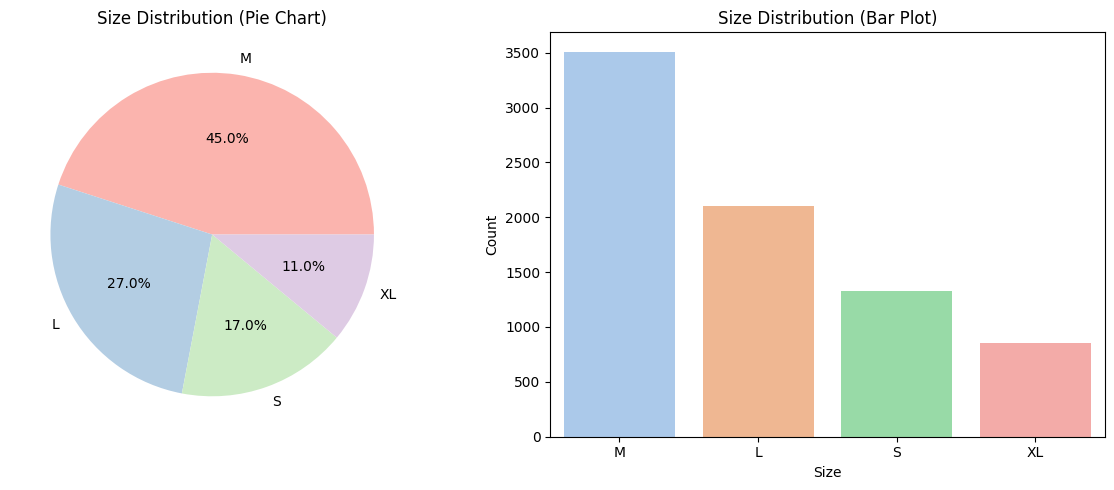

In [20]:
size_counts = df['Size'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Pie chart
axes[0].pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
axes[0].set_title('Size Distribution (Pie Chart)')
# Bar plot
sns.barplot(x=size_counts.index, y=size_counts.values, palette='pastel', ax=axes[1])
axes[1].set_title('Size Distribution (Bar Plot)')
axes[1].set_xlabel('Size')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

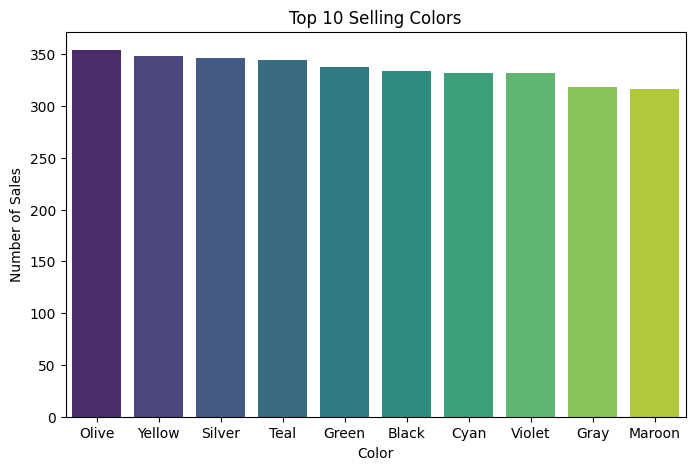

In [21]:
top_colors = df['Color'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='viridis')
plt.title("Top 10 Selling Colors")
plt.xlabel("Color")
plt.ylabel("Number of Sales")
plt.show()

In [22]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,51-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,18-20
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,51-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50


In [23]:
df['Season'].value_counts()

Season
Spring    1998
Fall      1950
Winter    1942
Summer    1910
Name: count, dtype: int64

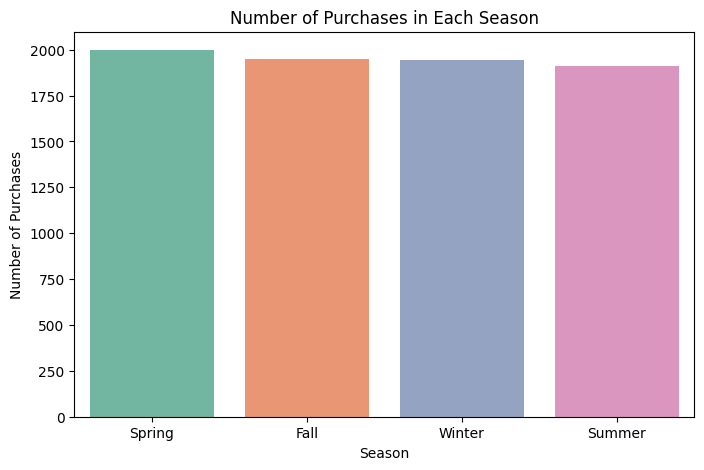

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x=season_sales.index, y=season_sales.values, palette='Set2')
plt.title('Number of Purchases in Each Season')
plt.ylabel('Number of Purchases')
plt.xlabel('Season')
plt.show()

3.7499487179487176


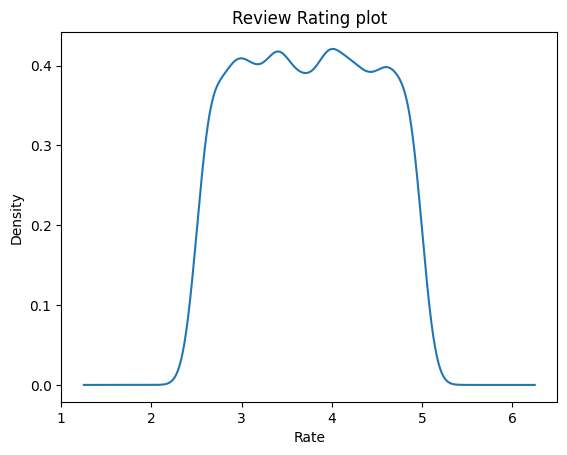

In [25]:
print(df['Review Rating'].mean())
df['Review Rating'].plot(kind='kde')
plt.title('Review Rating plot')
plt.xlabel('Rate')
plt.show()

In [26]:
df['Subscription Status'].value_counts()

Subscription Status
No     5694
Yes    2106
Name: count, dtype: int64

In [27]:
df['Payment Method'].value_counts()

Payment Method
Credit Card      1392
Venmo            1306
Cash             1296
PayPal           1276
Debit Card       1266
Bank Transfer    1264
Name: count, dtype: int64

In [43]:
shipping_type = df['Shipping Type'].value_counts()
print(shipping_type)

Shipping Type
Free Shipping     1350
Standard          1308
Store Pickup      1300
Next Day Air      1296
Express           1292
2-Day Shipping    1254
Name: count, dtype: int64


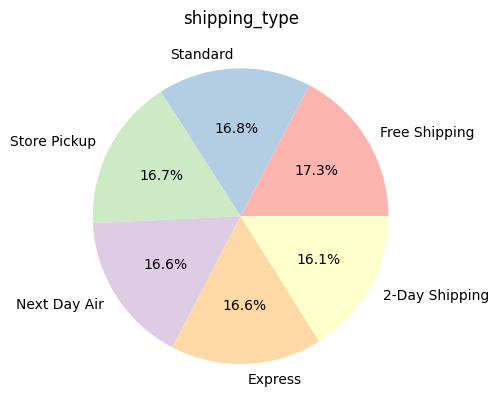

In [30]:
plt.pie(shipping_type , labels= shipping_type.index , autopct='%1.1f%%' , colors=plt.cm.Pastel1.colors)
plt.title('shipping_type')
plt.show()

In [31]:
df['Preferred Payment Method'].value_counts()

Preferred Payment Method
PayPal           1354
Credit Card      1342
Cash             1340
Debit Card       1272
Venmo            1268
Bank Transfer    1224
Name: count, dtype: int64

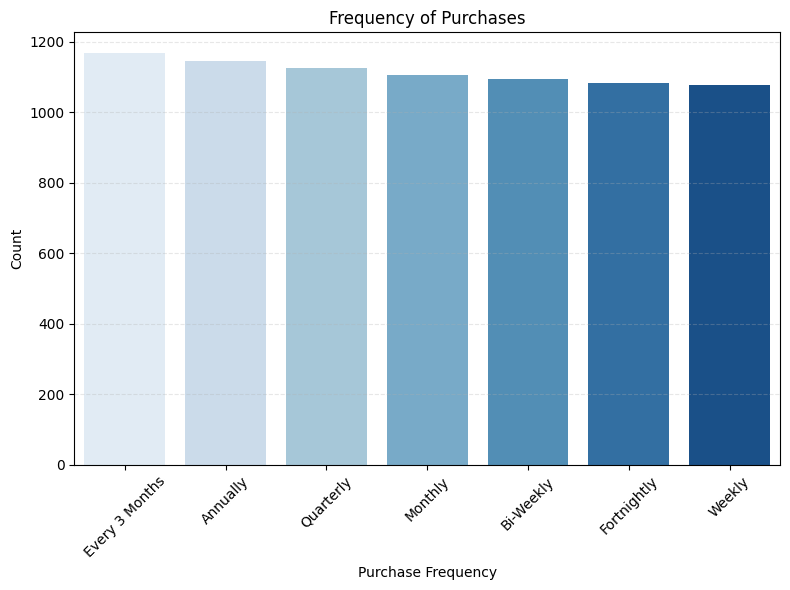

In [32]:
freq_counts = df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette='Blues')
plt.title('Frequency of Purchases')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

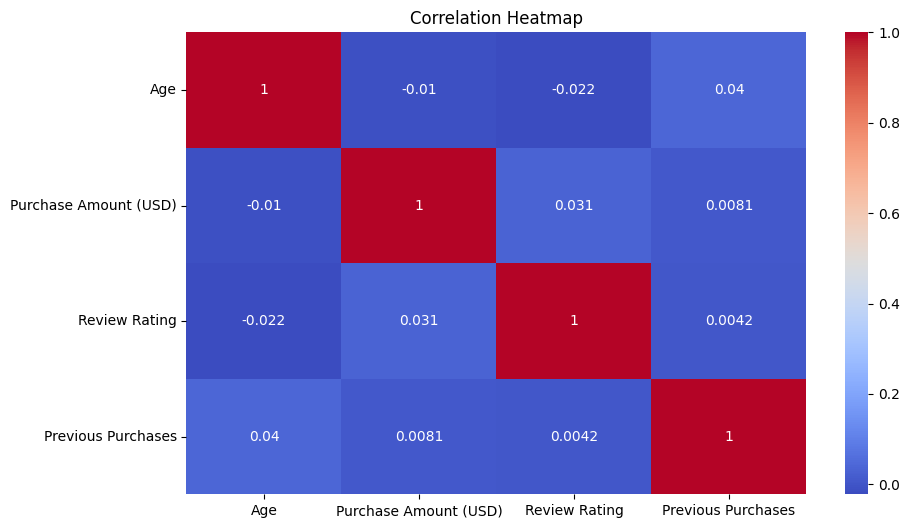

In [33]:
numeric_cols = df.select_dtypes(include="number").drop(columns = 'Customer ID')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

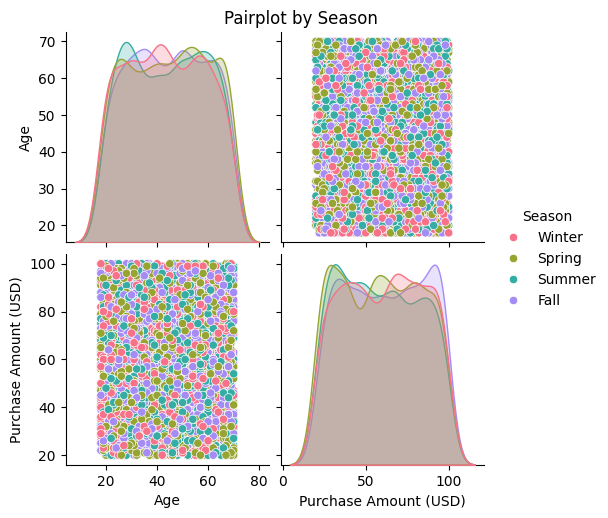

In [34]:
sns.pairplot(df, vars=["Age", "Purchase Amount (USD)"], hue="Season", palette="husl")
plt.suptitle("Pairplot by Season", y=1.02)
plt.show()

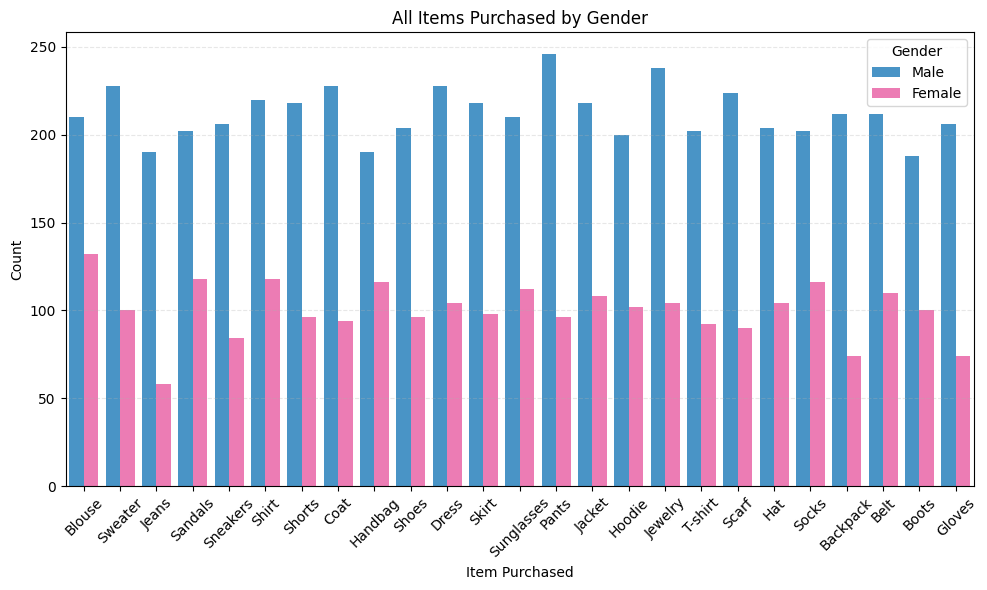

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Item Purchased', hue='Gender', palette=['#3498db', '#ff69b4'])

plt.title('All Items Purchased by Gender')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

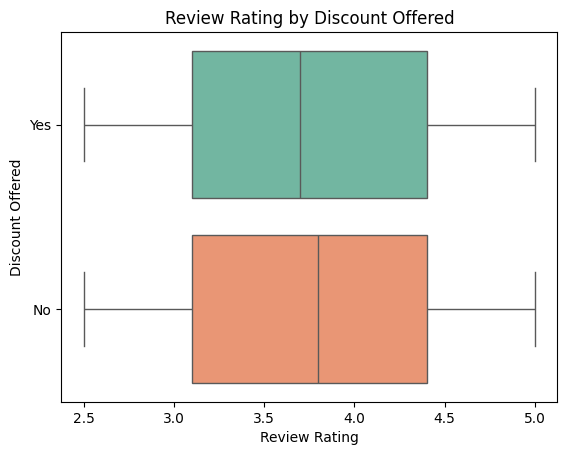

In [36]:

sns.boxplot(data=df, y="Discount Applied", x="Review Rating", palette="Set2")
plt.title("Review Rating by Discount Offered")
plt.ylabel("Discount Offered")
plt.xlabel("Review Rating")
plt.show()


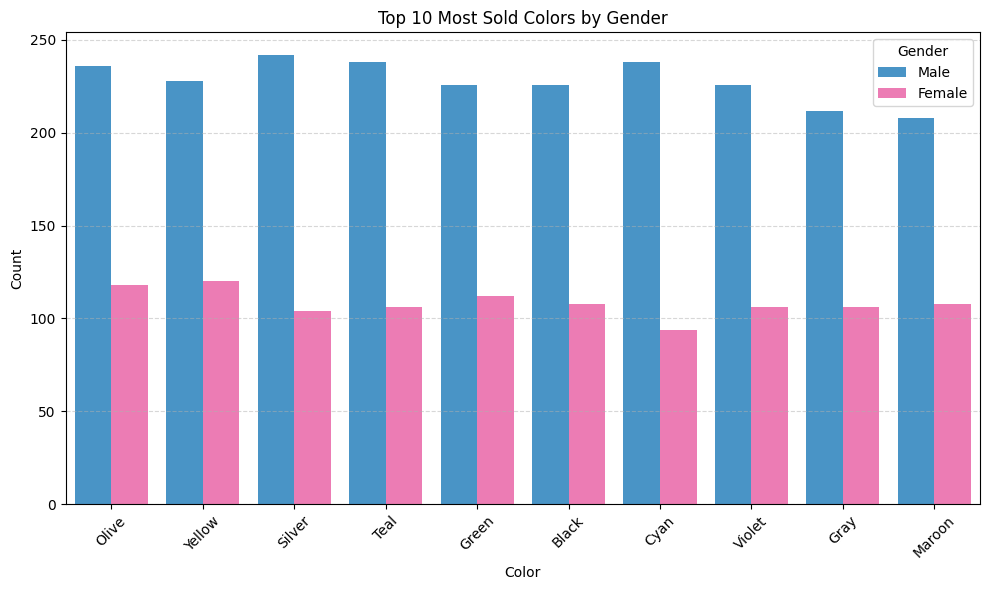

In [37]:
top_colors = df['Color'].value_counts().nlargest(10)
ordered_colors = top_colors.index  # الترتيب المطلوب

filtered_df = df[df['Color'].isin(ordered_colors)]

filtered_df['Color'] = pd.Categorical(filtered_df['Color'], categories=ordered_colors, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Color', hue='Gender', palette=['#3498db', '#ff69b4'])

plt.title('Top 10 Most Sold Colors by Gender')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [38]:
lowest_rated = df.groupby('Item Purchased')['Review Rating'].mean().sort_values().head(5)
print(lowest_rated)

Item Purchased
Shirt     3.629586
Jeans     3.648387
Blouse    3.683626
Scarf     3.700000
Shorts    3.711465
Name: Review Rating, dtype: float64


In [39]:
highest_rated = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head(5)
print(highest_rated)

Item Purchased
Gloves     3.864286
Sandals    3.841250
Boots      3.812500
Hat        3.806494
T-shirt    3.782993
Name: Review Rating, dtype: float64


### save data into excel file 

In [44]:
df.to_excel('ShoppingTrends.xlsx' , index=False)